# Understanding the Data
The dataset acquired from [Kaggle](https://www.kaggle.com/code/martinkk5575/language-detection/data) contains words from several different languages. The noise contained in the dataset are duplicate words. To reduce this noise, the words will be broken down into single and double characters, then rated based on how often they show up in that respective language.

In [1]:
import pandas as pd
import numpy as np

# Import data*
fileName = "dataset.csv"
data = pd.read_csv(fileName)

data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


# Splitting the Data


In [2]:
from sklearn.model_selection import train_test_split

X=data['Text'] # Feature matrix
y=data['language'] # Label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the languages into a DataFrame that we aren't modifying
languages = set(y)

In [3]:
import pandas as pd
cow = pd.DataFrame()
print(type(cow))
print(type(cow)==pd.DataFrame)

<class 'pandas.core.frame.DataFrame'>
True


# Creating Functions to Feature Engineer Our Data

In [4]:
def test_function(dataframe, chars):
    new_arr = np.zeros((1, len(chars)))
    j=0
    for char in chars:
        count = 0.0
        for letter in dataframe:
            if letter == char:
                count = count + 1.0
            fraction = count/len(dataframe)
        new_arr[0,j] = fraction
        j = j+1
    data_frame = pd.DataFrame(new_arr, columns = chars)
    return data_frame

chars_2 = ['e', 't', 'ä', 'ö', 'a', 'n', 'ก', 'ข', 'ค', 'ฅ', 'ฆ', 'ง', 'அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 
         'o', 'r', 'ー', '日', 'あ', 'ぁ', 'ぇ', 'ç', 'ğ', 'ı', 'İ', 'î', 'ö', 'ş', 'i', 'u', 'چ', 'ح', 'خ', 'ش',
         'â', 'ù', 'è', 's', 'î', 'ë', '胡', '童', '。', 'ᄁ', '알', '에', 'ᄃ', 'ऺ', 'त', 'ऻ', 'क', 'á', 'é', 'í', 
         'ó', 'ږ','ک', 'ﻑ', 'ی', 'م', 'ث', 'ţ', 'ă', 'ș', 'ş', 'б', 'в', 'г', 'д', 'ص', 'ف', 'ج', 'ر']

In [6]:
def feature_engineering_trial(dataframe, chars):
    if (type(type(dataframe)==str)):
        new_arr = np.zeros((1, len(chars)))
        j=0
        for char in chars:
            count = 0.0
            for letter in dataframe:
                if letter == char:
                    count = count + 1.0
                fraction = count/len(dataframe)
            new_arr[0,j] = fraction
            j = j+1
        data_frame = pd.DataFrame(new_arr, columns = chars)
        return data_frame
        
    if (type(type(dataframe)==pd.DataFrame)):
        arr = dataframe.to_numpy()
        new_arr = np.zeros((len(arr), len(chars)))
        i=0
        j=0
        for text in arr:
            sentence = text
            count = 0.0
            j=0
            for char in chars:
                count = 0.0
                for letter in sentence:
                    if letter == char:
                        count = count + 1.0
                    fraction = count/len(sentence)
                new_arr[i,j] = fraction
                j = j + 1
        
            i = i + 1
        data_frame = pd.DataFrame(new_arr, columns = chars)      
        return data_frame

In [7]:
def feature_engineering(dataframe, chars):
    arr = dataframe.to_numpy()
    new_arr = np.zeros((len(arr), len(chars)))
    i=0
    j=0
    for text in arr:
        sentence = text
        count = 0.0
        j=0
        for char in chars:
            count = 0.0
            for letter in sentence:
                if letter == char:
                    count = count + 1.0
                fraction = count/len(sentence)
            new_arr[i,j] = fraction
            j = j + 1
        
        i = i + 1
    data_frame = pd.DataFrame(new_arr, columns = chars)      
    return data_frame

In [8]:
def feature_engineering_2(dataframe, chars):
    arr = dataframe.to_numpy()
    new_arr = np.zeros((len(arr), len(chars)))
    i=0
    j=0
    for text in arr:
        sentence = text
        count = 0.0
        j = 0
        for list in chars:
            count = 0.0
            for char in list:
                for letter in sentence:
                    if letter == char:
                        count = count + 1.0
            fraction = count/len(sentence)
            new_arr[i,j] = fraction
            j = j+1
        i = i+1
    
    names = ['english', 'estonian', 'swedish', 'thai', 'tamil', 'dutch', 'japanese', 'turkish', 'latin', 'urdu',
             'indonesian', 'portuguese', 'french', 'chinese', 'korean', 'hindi', 'spanish', 'pushto', 'persian',
             'romanian', 'russian', 'arabic']
    
    data_frame = pd.DataFrame(new_arr, columns = names)
    return data_frame
                

# Testing Our Functions

In [9]:
new_chars = [['e', 't', 'a', 'i', 'o', 'n', 's', 'h', 'r'], ['a', 'e', 'i', 'ä', 'ö', 'õ', 'š', 'ü', 'ž'], 
             ['å', 'ä', 'ö', 'a', 'e', 't', 'n', 'r', 's', 'i'], ['ก', 'ข', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช', 'ฌ'],
             ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ'], ['a', 'e', 'i', 'o', 'h', 'n', 'r', 't', 's'], 
             ['㍿', '㍐', 'ヿ', 'ヾ', 'ヽ', 'ー', '・', 'ヺ', 'ヹ', 'ヸ'], ['ç', 'ğ', 'ı', 'İ', 'î', 'ö', 'ş', 'ü', 'a', 'e'],
             ['a', 'e', 'i', 'n', 'r', 's', 't', 'u', 'm', 'd'], ['چ', 'ح', 'خ', 'ش', 'ن', 'ٹ', 'ن', 'ث', 'گ', 'ج'],
             ['a', 'A', 'i', 'n', 'r', 'm', 's', 't', 'u', 'g'], ['â', 'ê', 'ô', 'ã', 'õ', 'à', 'è', 'ì', 'ò', 'ù'],
             ['ô', 'û', 'à', 'è', 'ì', 'ò', 'ù', 'ë', 'ï', 'ü'], ['主', '人', '公', '阿', '米', '尔', '一', '样', '都', '是'],
             ['응','의','이','익','인','일','임','입','잉','잎'], ['ः', 'ऺ', 'ऻ', 'ा', 'ि', 'ी', 'ॎ', 'ई', 'उ', 'ऊ'], 
             ['á', 'é', 'í', 'ó', 'ú', 'ñ', 'ü', 't', 'e', 'i'], ['ت', 'ا', 'ې', 'ښ', 'ن', 'ر', 'ع', 'ط', 'ړ', 'س'],
             ['ق', ' غ', 'ج', 'ت', ' ن ', 'ی', 'ل ', 'ظ', 'ص', 'ز'], ['ă', 'â', 'î', 'ș', 'ş', 'ț', 'ţ'], 
             ['б', 'в', 'г', 'д', 'ж', 'з', 'к', 'л', 'м', 'н'], ['م', 'ص', 'ظ', 'و', 'ر', 'م', 'ي', 'ج', 'ز', 'ق']]

panda = X_train.head()
some_data = feature_engineering_2(panda, new_chars)
some_data
    

,english,estonian,swedish,thai,tamil,dutch,japanese,turkish,latin,urdu,...,french,chinese,korean,hindi,spanish,pushto,persian,romanian,russian,arabic
0,0.000000,0.000000,0.000000,0.118919,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.157277,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.523622,0.263780,0.523622,0.000000,0.000000,0.523622,0.0,0.192913,0.598425,0.0,...,0.0,0.0,0.0,0.0,0.208661,0.0,0.0,0.0,0.000000,0.0
3,0.038062,0.013841,0.031142,0.000000,0.034602,0.038062,0.0,0.006920,0.031142,0.0,...,0.0,0.0,0.0,0.0,0.013841,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.264471,0.0


# 1st Model: RandomForrestClassifier

This model is trained on a list of 44 characters and the first 3000 rows of our X_train data. Our performance metric is accuracy score.

In [62]:
X_train_ready = feature_engineering(X_train.head(9000), chars_2)

y_train_ready = y_train.head(9000)

X_test_ready = feature_engineering(X_test, chars_2)

In [11]:
#First Model Trained
#characters for first model
chars_2 = ['e', 't', 'ä', 'ö', 'a', 'n', 'ก', 'ข', 'ค', 'ฅ', 'ฆ', 'ง', 'அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 
         'o', 'r', 'ー', '日', 'あ', 'ぁ', 'ぇ', 'ç', 'ğ', 'ı', 'İ', 'î', 'ö', 'ş', 'i', 'u', 'چ', 'ح', 'خ', 'ش',
         'â', 'ù', 'è', 's', 'î', 'ë', '胡', '童', '。', 'ᄁ', '알', '에', 'ᄃ', 'ऺ', 'त', 'ऻ', 'क', 'á', 'é', 'í', 
         'ó', 'ږ','ک', 'ﻑ', 'ی', 'م', 'ث', 'ţ', 'ă', 'ș', 'ş', 'б', 'в', 'г', 'д', 'ص', 'ف', 'ج', 'ر']

X_train_2 = X_train.head(3000)
model_one = feature_engineering(X_train_2, chars_2)
model_one

y_train_one = y_train.head(3000)

from sklearn.ensemble import RandomForestClassifier

# Instantiate a random forest clf model
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

# fit our model with our training data
rnd_clf.fit(model_one, y_train_one)

X_test_1 = feature_engineering(X_test, chars_2)

# save our predictions
y_preds = rnd_clf.predict(X_test_1)

from sklearn.metrics import accuracy_score

# instantiate accuracy score metric
acc_score = accuracy_score(y_test, y_preds)

# showcase score
print('Accuracy=%s' % (acc_score))

import pickle #ask about pickle

saved_model = pickle.dumps(rnd_clf)

rdf_from_pickle = pickle.loads(saved_model)

Accuracy=0.8822727272727273


Same model, but training on the whole X_train dataset

In [12]:
#First Model Trained
#characters for first model
chars_2 = ['e', 't', 'ä', 'ö', 'a', 'n', 'ก', 'ข', 'ค', 'ฅ', 'ฆ', 'ง', 'அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 
         'o', 'r', 'ー', '日', 'あ', 'ぁ', 'ぇ', 'ç', 'ğ', 'ı', 'İ', 'î', 'ö', 'ş', 'i', 'u', 'چ', 'ح', 'خ', 'ش',
         'â', 'ù', 'è', 's', 'î', 'ë', '胡', '童', '。', 'ᄁ', '알', '에', 'ᄃ', 'ऺ', 'त', 'ऻ', 'क', 'á', 'é', 'í', 
         'ó', 'ږ','ک', 'ﻑ', 'ی', 'م', 'ث', 'ţ', 'ă', 'ș', 'ş', 'б', 'в', 'г', 'д', 'ص', 'ف', 'ج', 'ر']

X_train_ready = feature_engineering(X_train, chars_2)

from sklearn.ensemble import RandomForestClassifier

# Instantiate a random forest clf model
rnd_clf_full = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

# fit our model with our training data
rnd_clf_full.fit(X_train_ready, y_train)

X_test_ready = feature_engineering(X_test, chars_2)

# save our predictions
y_predictions = rnd_clf_full.predict(X_test_ready)

from sklearn.metrics import accuracy_score

# instantiate accuracy metric
acc_score = accuracy_score(y_test, y_predictions)

# showcase the accuracy score
print('Accuracy=%s' % (acc_score))

Accuracy=0.8809090909090909


# Predicting the language of a string

Using the predict method to send a string and predict what language it is

In [13]:
# test our model with a new unseen string
string = "Hej, jag heter Jesse Byler. Den här meningen är på engelska, så förhoppningsvis klassas den som engelska. Det skulle vara trevligt, eller hur?"

hello = test_function(string, chars_2)

# attempt to predict the language of the string
pred_swed = rnd_clf.predict(hello)

# showcase our prediction
pred_swed

array(['Swedish'], dtype=object)

# Second Model: RandomForrestClassifier
BUT: we will send a list of lists into our feature_engeering function instead of a list of characters! We will train the model on the first 6,000 rows of the X_train data

In [24]:
X_train_2 = X_train.head(6000)
X_train_2_eng = feature_engineering_2(X_train_2, new_chars)

y_train_2 = y_train.head(6000)

from sklearn.ensemble import RandomForestClassifier

# instantiate random forest clf 
rnd_clf_2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

# train our random forest clf
rnd_clf_2.fit(X_train_2_eng, y_train_2)

X_test_2 = feature_engineering_2(X_test, new_chars)

# save predictions
y_preds_2 = rnd_clf_2.predict(X_test_2)

from sklearn.metrics import accuracy_score

# instantiate an accuracy score
acc_score_2 = accuracy_score(y_test, y_preds_2)

print('Accuracy=%s' % (acc_score_2))

Accuracy=0.8252272727272727


# Third Model: Decision Tree Model
Now I will train a decision tree model, later a grid search will be conducted

In [14]:
X_train.size

17600

In [15]:
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model
tree_clf = DecisionTreeClassifier(random_state=42)

# train our decision tree model
tree_clf.fit(feature_engineering(X_train.head(9000), chars_2), y_train.head(9000))

# save the predictions
preds = tree_clf.predict(feature_engineering(X_test, chars_2))

# instantiate an accuracy score metric
acc_score_tree = accuracy_score(y_test, preds)

print('Accuracy=%s' % (acc_score_tree))

Accuracy=0.8811363636363636


# Grid Searches for Decision Tree Hyperparameters to find optimal hyperparameters

In [16]:
from sklearn.model_selection import GridSearchCV

# instantiate our parameter grid of possible hyperparameter outcomes
param_grid = {'max_depth': [2,4,6,8,10,20,30,40,50], 'max_leaf_nodes': [2,4,6,8,10,20,30,40,50], 
                          'min_samples_split': [2,4,6,8,10,20,30,40,50]}

# instantiate the grid search using 3-fold cross validation
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid,
                              verbose=1,
                              cv=3)

# fit our grid search to our training data
grid_search_cv.fit(feature_engineering(X_train.head(9000), chars_2), y_train.head(9000))

# showcase what seems to be the best hyperparameters
print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 20, 'max_leaf_nodes': 50, 'min_samples_split': 40}


[Parallel(n_jobs=1)]: Done 2187 out of 2187 | elapsed:  2.9min finished


In [17]:
# instantiate another parameter grid of possible hyperparameter outcomes
param_grid = {'max_depth': [15,17,19,20,21,23,25], 'max_leaf_nodes': [40,45,50,55,60,70,80], 
                          'min_samples_split': [35,37,39,40,41,43,45]}

# instantiate the grid search using 3-fold cross validation
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid,
                              verbose=1,
                              cv=3)

# fit our grid search to our training data
grid_search_cv.fit(feature_engineering(X_train.head(9000), chars_2), y_train.head(9000))

# showcase optimal parameters
print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 343 candidates, totalling 1029 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1029 out of 1029 | elapsed:  2.2min finished


The best parameters are:  {'max_depth': 21, 'max_leaf_nodes': 70, 'min_samples_split': 39}


In [18]:
# Repeat grid search process
param_grid = {'max_depth': [20,21,22], 'max_leaf_nodes': [65,67,69,70,71,73,75], 
                          'min_samples_split': [38,39,40]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid,
                              verbose=1,
                              cv=3)

grid_search_cv.fit(feature_engineering(X_train.head(9000), chars_2), y_train.head(9000))

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 22, 'max_leaf_nodes': 75, 'min_samples_split': 38}


[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:   22.6s finished


In [18]:
# Repeat grid search process
param_grid = {'max_depth': [20,21,22,23,24], 'max_leaf_nodes': [73,74,75,76,77,78,79], 
                          'min_samples_split': [36,37,38,39,40]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid,
                              verbose=1,
                              cv=3)

grid_search_cv.fit(feature_engineering(X_train.head(9000), chars_2), y_train.head(9000))

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 175 candidates, totalling 525 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 22, 'max_leaf_nodes': 75, 'min_samples_split': 36}


[Parallel(n_jobs=1)]: Done 525 out of 525 | elapsed:  1.1min finished


# Fourth Model: Decision Tree with optimal parameters

In [24]:
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree clf model with optimal hyper parameters
tree_clf_opt = DecisionTreeClassifier(max_depth=22, max_leaf_nodes=75,
                                      min_samples_split=36, random_state=42)

# fit our model onto our training data
tree_clf_opt.fit(feature_engineering(X_train.head(9000), chars_2), y_train.head(9000))

# save our predictions
opt_preds = tree_clf_opt.predict(feature_engineering(X_test, chars_2))

# instantiate our accuracy score
acc_score_tree_opt = accuracy_score(y_test, opt_preds)

# showcase accuracy score
print('Accuracy=%s' % (acc_score_tree_opt))

Accuracy=0.8934090909090909


With the optimal hyperparameters, the accuracy score went up 1.23%

# Lets Evaluate How Many Text were Misclassified (Decision Tree)

In [160]:
# Labels
label_arr = np.array(y_test) # store actual label into array data structure
label_DF = pd.DataFrame(label_arr, columns = ['Labels']) # store actual label into Data Frame data structure

# Predictions
pred_arr = np.array(opt_preds) # store predictions in array 
pred_DF = pd.DataFrame(pred_arr, columns = ['Predictions']) # store actual label into Data Frame data structure

# Combine Dfs to together to create one DF
label_DF = label_DF.assign(Predictions=pred_DF) #assign invocation used to place the reg_outputs list as a column and values called regreesion_predicted


In [110]:
# convert label DF to an array
label_array = np.array(label_DF)

# initialize our error
error = 0

### Count up the total number of misclassifications

# initialize all counters 
portugese_count = 0; japanese_count = 0; russian_count=0; latin_count=0; pushto_count=0;hindi_count=0; dutch_count=0;chinese_count=0;
urdu_count=0;korean_count=0;french_count=0;thai_count=0;swedish_count=0; english_count=0;estonian_count=0;turkish_count =0;
indonesian_count=0;tamil_count=0;arabic_count=0;persian_count=0;spanish_count=0;romanian_count=0;

# count up frequency of all errors for every language (22 languages)
for label in label_array:
    if label[0] != label[1]:
        error = error + 1
        if label[0] == "Portugese":
            portugese_count = portugese_count + 1
        if label[0] == "Japanese":
            japanese_count = japanese_count + 1
        if label[0] == "Russian":
            russian_count = russian_count + 1
        if label[0] == "Latin":
            latin_count = latin_count + 1
        if label[0] == "Pushto":
            pushto_count = pushto_count + 1
        if label[0] == "Hindi":
            hindi_count = hindi_count + 1
        if label[0] == "Dutch":
            dutch_count = dutch_count + 1
        if label[0] == "Chinese":
            chinese_count = chinese_count + 1
        if label[0] == "Urdu":
            urdu_count = urdu_count + 1
        if label[0] == "Korean":
            korean_count = korean_count + 1
        if label[0] == "French":
            french_count = french_count + 1      
        if label[0] == "Thai":
            thai_count = thai_count + 1
        if label[0] == "Swedish":
            swedish_count = swedish_count + 1
        if label[0] == "English":
            english_count = english_count + 1       
        if label[0] == "Estonian":
            estonian_count = estonian_count + 1
        if label[0] == "Turkish":
            turkish_count = turkish_count + 1
        if label[0] == "Indonesian":
            indonesian_count = indonesian_count + 1
        if label[0] == "Tamil":
            tamil_count = tamil_count + 1
        if label[0] == "Arabic":
            arabic_count = arabic_count + 1
        if label[0] == "Persian":
            persian_count = persian_count + 1
        if label[0] == "Spanish":
            spanish_count = spanish_count + 1
        if label[0] == "Romanian":
            romanian_count = romanian_count + 1
        
#print(japanese_count, portugese_count, chinese_count, dutch_count, hindi_count, pushto_count, latin_count, russian_count)
print("We have",error, "misclassifications for our Decision Tree model.")
   
# list of language misclassification frequencies
language_count_arr = [portugese_count, japanese_count, russian_count, latin_count, pushto_count, hindi_count, dutch_count, chinese_count,
urdu_count, korean_count, french_count, thai_count, swedish_count, english_count, estonian_count, turkish_count,
indonesian_count, tamil_count, arabic_count, persian_count, spanish_count, romanian_count]

# set of languages
lang_list = list(set(list(data['language'])))


We have 469 misclassifications for our Decision Tree model.


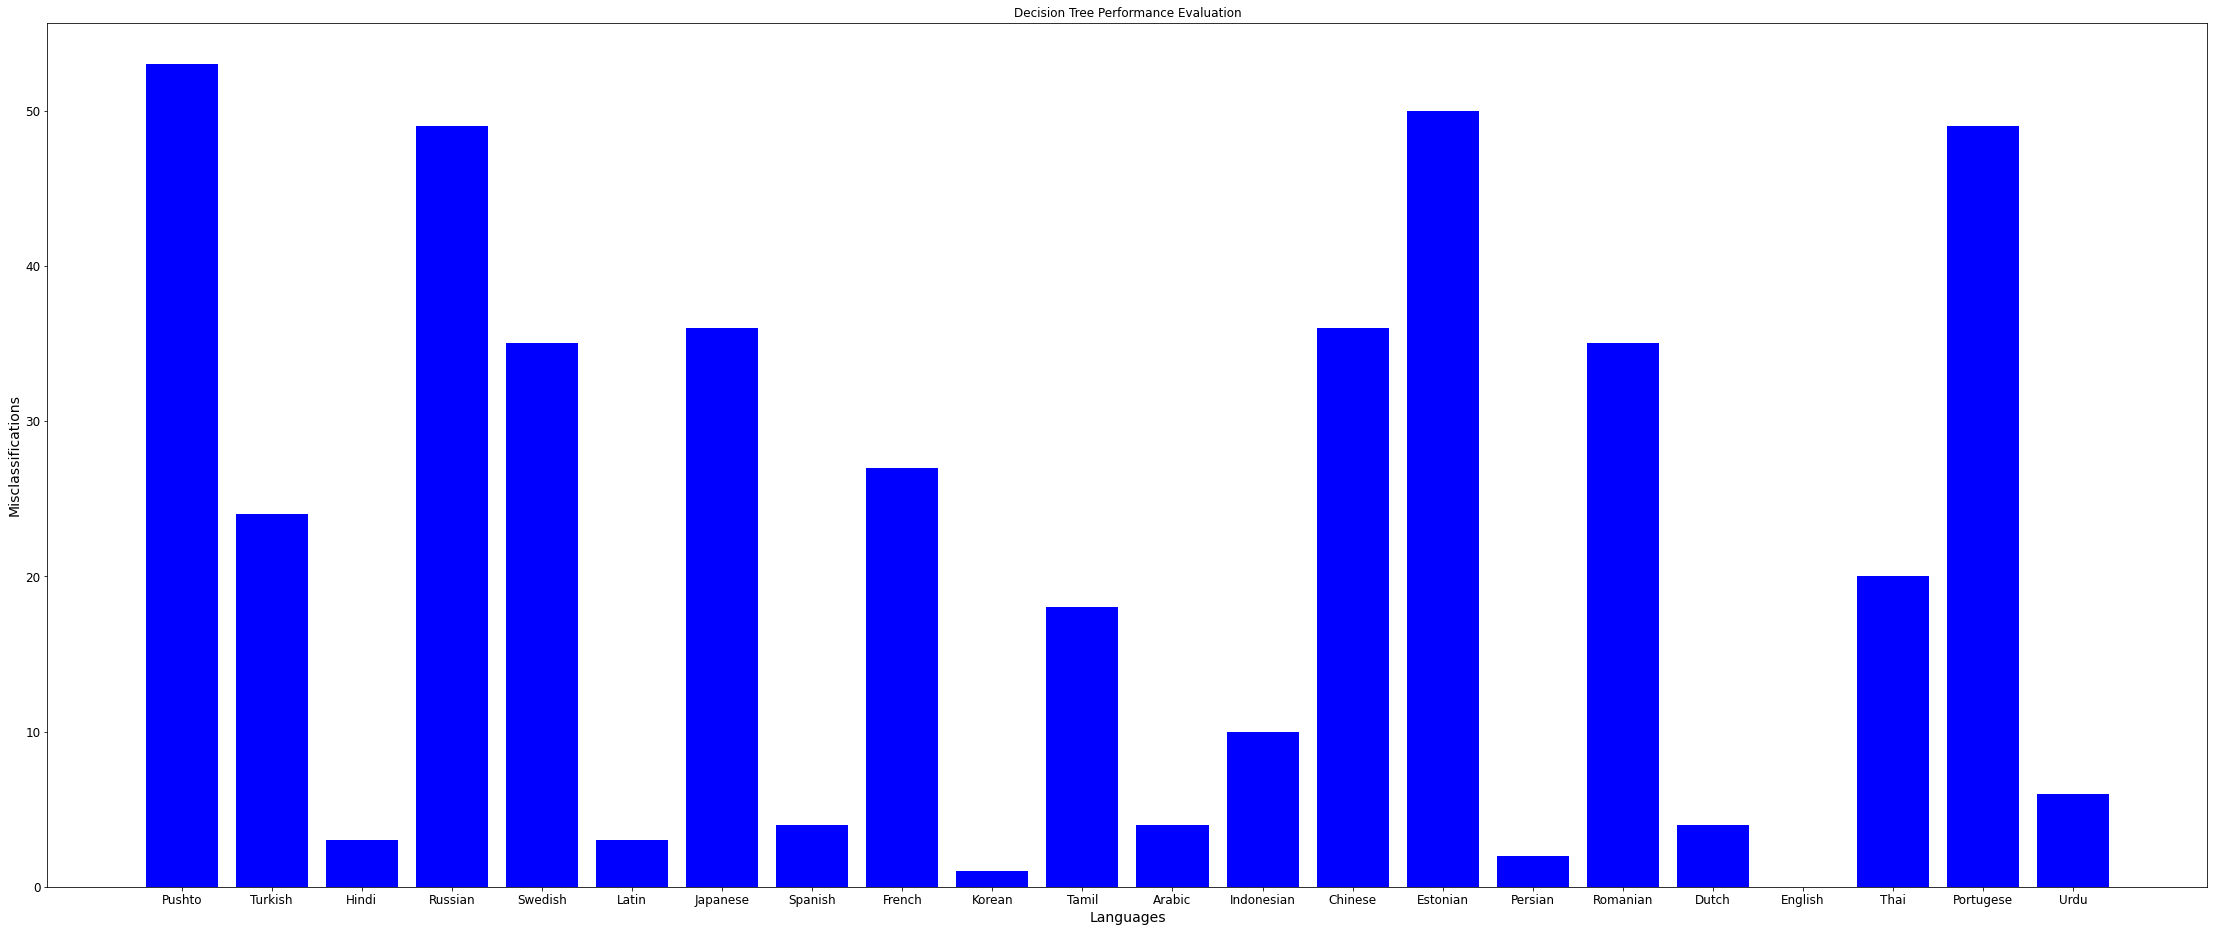

In [124]:
import matplotlib.pyplot as plt

# construct figure
fig = plt.figure()
ax = fig.add_axes([0,0,5,3])

# Construct bar plot and showcase
ax.bar(lang_list,language_count_arr, color = "blue")
plt.xlabel('Languages')
plt.ylabel('Misclassifications')
plt.title('Decision Tree Performance Evaluation')
plt.show()

# Grid Searches for Random Forest Hyperparameters

In [63]:
from sklearn.model_selection import GridSearchCV

# instantiate parameter grid
param_grid_2 = {'max_depth': [1,2,3,4,5,10,20,30,40,50], 'n_estimators': [10,100,200,300,400,500],
              'min_samples_split': [5,10,20,30,40,50]}

# instantiate grid search
grid_search_cv_2 = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_2,
                              verbose=1,
                              cv=3)

# fit our grid search onto the training data
grid_search_cv_2.fit(X_train_ready, y_train_ready)

# showcase best parameters
print("The best parameters are: ", grid_search_cv_2.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 51.3min finished


The best parameters are:  {'max_depth': 40, 'min_samples_split': 10, 'n_estimators': 500}


In [64]:
# repeat
param_grid_2 = {'max_depth': [35,37,39,40,41,43,45], 'n_estimators': [500,600,700],
              'min_samples_split': [5,7,9,10,11,13,15]}

grid_search_cv_2 = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_2,
                              verbose=1,
                              cv=3)

grid_search_cv_2.fit(X_train_ready, y_train_ready)

print("The best parameters are: ", grid_search_cv_2.best_params_)

Fitting 3 folds for each of 147 candidates, totalling 441 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 441 out of 441 | elapsed: 245.9min finished


The best parameters are:  {'max_depth': 45, 'min_samples_split': 7, 'n_estimators': 700}


In [65]:
# repeat
param_grid_2 = {'max_depth': [40,42,44,45,46,48,50], 'n_estimators': [160,600,700,800],
              'min_samples_split': [5,6,7,8,9]}

grid_search_cv_2 = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_2,
                              verbose=1,
                              cv=3)

grid_search_cv_2.fit(X_train_ready, y_train_ready)

print("The best parameters are: ", grid_search_cv_2.best_params_)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed: 146.2min finished


The best parameters are:  {'max_depth': 45, 'min_samples_split': 7, 'n_estimators': 700}


In [66]:
# repeat
param_grid_2 = {'max_depth': [45], 'n_estimators': [650,675,700,725,750],
              'min_samples_split': [7]}

grid_search_cv_2 = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_2,
                              verbose=1,
                              cv=3)

grid_search_cv_2.fit(X_train_ready, y_train_ready)

print("The best parameters are: ", grid_search_cv_2.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  4.4min finished


The best parameters are:  {'max_depth': 45, 'min_samples_split': 7, 'n_estimators': 700}


In [67]:
# repeat
param_grid_2 = {'max_depth': [45], 'n_estimators': [685,695,700,705,715],
              'min_samples_split': [7]}

grid_search_cv_2 = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_2,
                              verbose=1,
                              cv=3)

grid_search_cv_2.fit(X_train_ready, y_train_ready)

print("The best parameters are: ", grid_search_cv_2.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.4min finished


The best parameters are:  {'max_depth': 45, 'min_samples_split': 7, 'n_estimators': 715}


In [68]:
# repeat
param_grid_2 = {'max_depth': [45], 'n_estimators': [710,714,715,716,720],
              'min_samples_split': [7]}

grid_search_cv_2 = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_2,
                              verbose=1,
                              cv=3)

grid_search_cv_2.fit(X_train_ready, y_train_ready)

print("The best parameters are: ", grid_search_cv_2.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.2min finished


The best parameters are:  {'max_depth': 45, 'min_samples_split': 7, 'n_estimators': 716}


In [69]:
# repeat
param_grid_2 = {'max_depth': [45], 'n_estimators': [715,716,717,718],
              'min_samples_split': [7]}

grid_search_cv_2 = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_2,
                              verbose=1,
                              cv=3)

grid_search_cv_2.fit(X_train_ready, y_train_ready)

print("The best parameters are: ", grid_search_cv_2.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.1min finished


The best parameters are:  {'max_depth': 45, 'min_samples_split': 7, 'n_estimators': 716}


In [70]:
# repeat
param_grid_2 = {'max_depth': [45], 'n_estimators': [716],
              'min_samples_split': [7], 'max_leaf_nodes': [10,20,30,40,50]}

grid_search_cv_2 = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_2,
                              verbose=1,
                              cv=3)

grid_search_cv_2.fit(X_train_ready, y_train_ready)

print("The best parameters are: ", grid_search_cv_2.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.6min finished


The best parameters are:  {'max_depth': 45, 'max_leaf_nodes': 50, 'min_samples_split': 7, 'n_estimators': 716}


# Fifth Model: Random Forrest with Optimal Parameters

In [71]:
from sklearn.ensemble import RandomForestClassifier

# instantiate random forest clf model
rnd_clf_opt = RandomForestClassifier(n_estimators=716, min_samples_split=7, max_depth=45, max_leaf_nodes=50, random_state=42)

# fit our model onto our training data
rnd_clf_opt.fit(X_train_ready, y_train_ready)

# save our predictions
y_preds_opt = rnd_clf_opt.predict(X_test_ready)

# instantiate accuracy score and showcase the score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_preds_opt)

print('Accuracy=%s' % (acc_score))

Accuracy=0.9113636363636364


# Lets Evaluate How Many Text were Misclassified (Random Forest)

In [159]:
# Labels
label_arr = np.array(y_test) # store actual label into array data structure
label_DF = pd.DataFrame(label_arr, columns = ['Labels']) # store actual label into Data Frame data structure

# Predictions
pred_arr2 = np.array(y_preds_opt) # store predictions in array 
pred_DF2 = pd.DataFrame(pred_arr2, columns = ['Predictions']) # store actual label into Data Frame data structure

# Combine Dfs to together to create one DF
label_DF2 = label_DF.assign(Predictions=pred_DF2) #assign invocation used to place the reg_outputs list as a column and values called regreesion_predicted


In [130]:
# convert label DF to an array
label_array2 = np.array(label_DF2)

# initialize our error
error = 0

### Count up the total number of misclassifications

# initialize all counters 
portugese_count = 0; japanese_count = 0; russian_count=0; latin_count=0; pushto_count=0;hindi_count=0; dutch_count=0;chinese_count=0;
urdu_count=0;korean_count=0;french_count=0;thai_count=0;swedish_count=0; english_count=0;estonian_count=0;turkish_count =0;
indonesian_count=0;tamil_count=0;arabic_count=0;persian_count=0;spanish_count=0;romanian_count=0;

# count up frequency of all errors for every language (22 languages)
for label in label_array2:
    if label[0] != label[1]:
        error = error + 1
        if label[0] == "Portugese":
            portugese_count = portugese_count + 1
        if label[0] == "Japanese":
            japanese_count = japanese_count + 1
        if label[0] == "Russian":
            russian_count = russian_count + 1
        if label[0] == "Latin":
            latin_count = latin_count + 1
        if label[0] == "Pushto":
            pushto_count = pushto_count + 1
        if label[0] == "Hindi":
            hindi_count = hindi_count + 1
        if label[0] == "Dutch":
            dutch_count = dutch_count + 1
        if label[0] == "Chinese":
            chinese_count = chinese_count + 1
        if label[0] == "Urdu":
            urdu_count = urdu_count + 1
        if label[0] == "Korean":
            korean_count = korean_count + 1
        if label[0] == "French":
            french_count = french_count + 1      
        if label[0] == "Thai":
            thai_count = thai_count + 1
        if label[0] == "Swedish":
            swedish_count = swedish_count + 1
        if label[0] == "English":
            english_count = english_count + 1       
        if label[0] == "Estonian":
            estonian_count = estonian_count + 1
        if label[0] == "Turkish":
            turkish_count = turkish_count + 1
        if label[0] == "Indonesian":
            indonesian_count = indonesian_count + 1
        if label[0] == "Tamil":
            tamil_count = tamil_count + 1
        if label[0] == "Arabic":
            arabic_count = arabic_count + 1
        if label[0] == "Persian":
            persian_count = persian_count + 1
        if label[0] == "Spanish":
            spanish_count = spanish_count + 1
        if label[0] == "Romanian":
            romanian_count = romanian_count + 1
            
# showcase how many misclassifications we have in total       
print("We have",error, "misclassifications for our Random Forest model.")
   
# list of language misclassification frequencies
language_count_arr = [portugese_count, japanese_count, russian_count, latin_count, pushto_count, hindi_count, dutch_count, chinese_count,
urdu_count, korean_count, french_count, thai_count, swedish_count, english_count, estonian_count, turkish_count,
indonesian_count, tamil_count, arabic_count, persian_count, spanish_count, romanian_count]

# set of languages
lang_list = list(set(list(data['language'])))

We have 390 misclassifications for our Random Forest model.


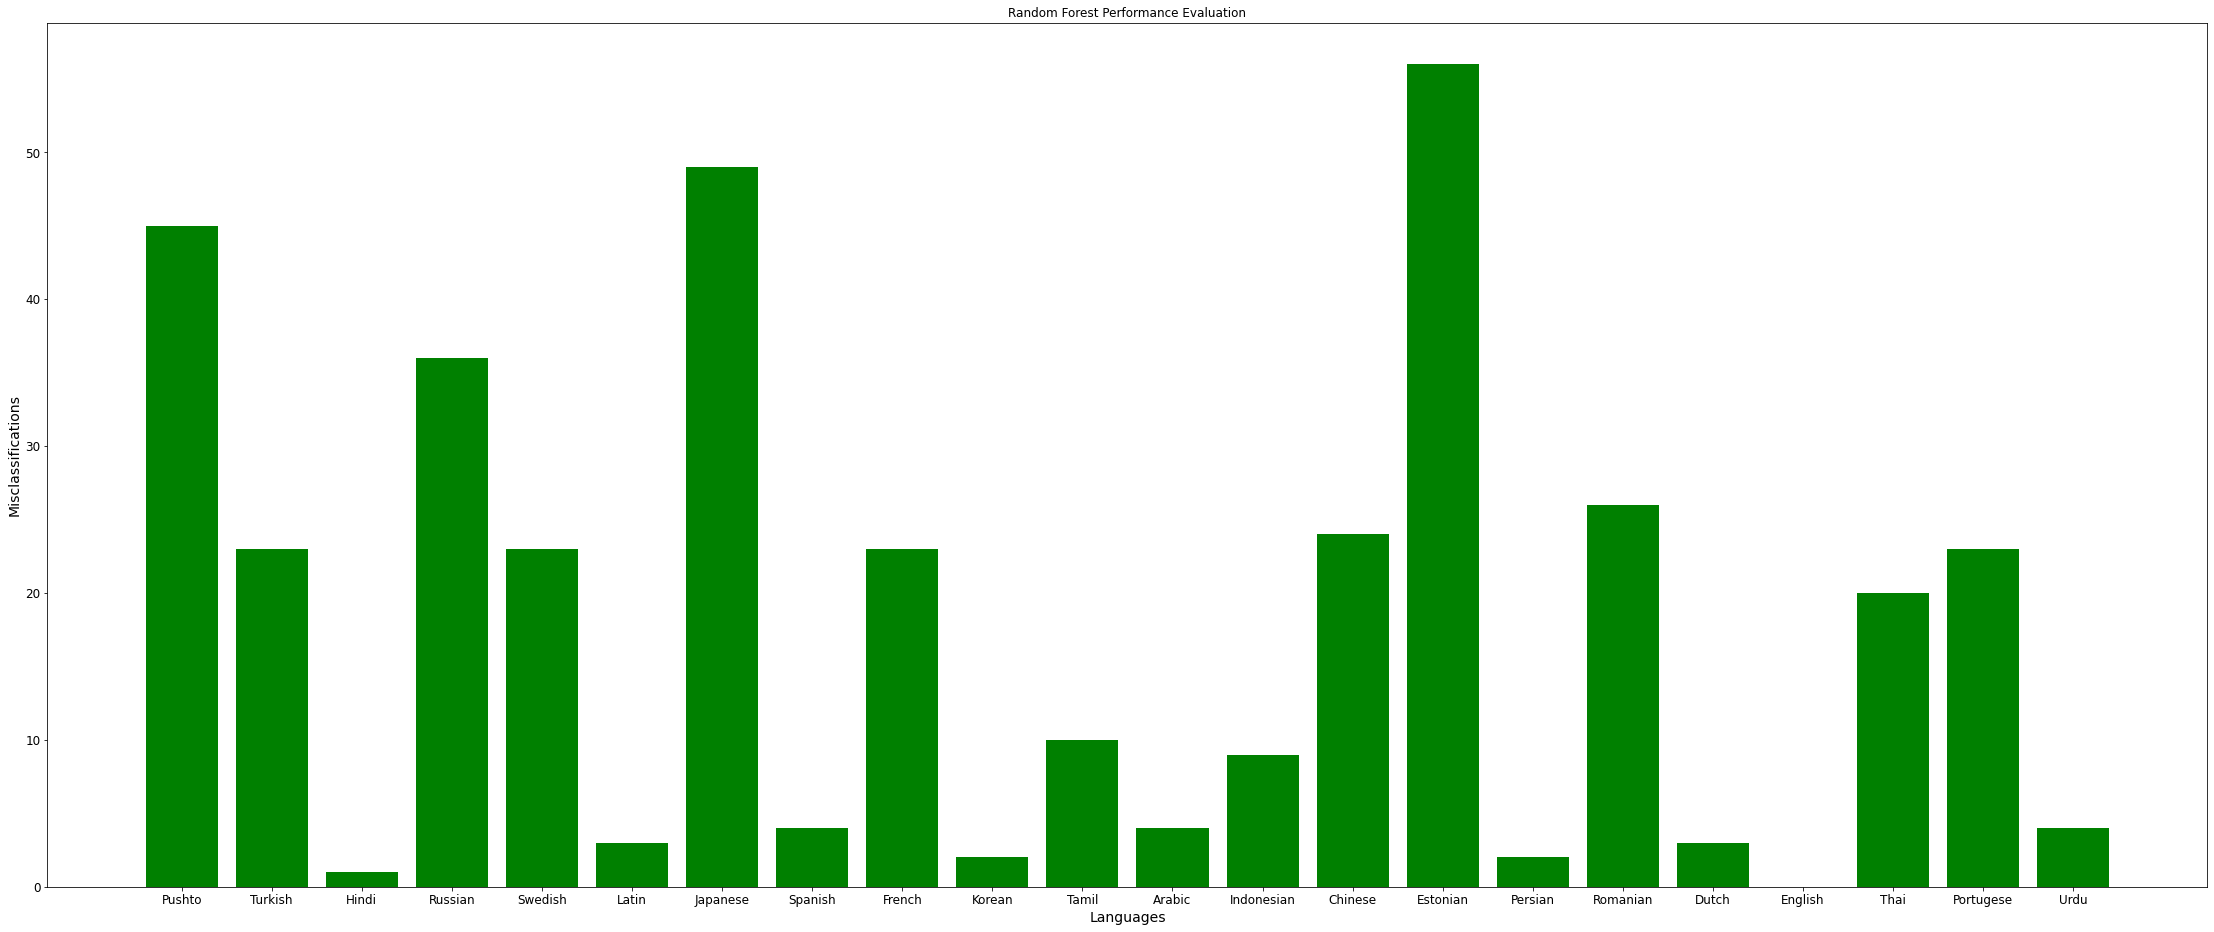

In [131]:
import matplotlib.pyplot as plt

# construct figure
fig = plt.figure()
ax = fig.add_axes([0,0,5,3])

# Construct bar plot and showcase
ax.bar(lang_list,language_count_arr, color = "Green")
plt.xlabel('Languages')
plt.ylabel('Misclassifications')
plt.title('Random Forest Performance Evaluation')
plt.show()

# Gradient Boosting Classifier Model

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate our model
gbrt = GradientBoostingClassifier(random_state=42)

# train our model
gbrt.fit(X_train_ready, y_train_ready)

# save predictions
gbrt_preds = gbrt.predict(X_test_ready)

from sklearn.metrics import accuracy_score

# instantiate accuracy score
acc_score_gbrt = accuracy_score(y_test, gbrt_preds)

print('Accuracy=%s' % (acc_score_gbrt))

Accuracy=0.9227272727272727


# Lets Evaluate How Many Text were Misclassified (Gradient Booster Model)

In [158]:
# Labels
label_arr = np.array(y_test) # store actual label into array data structure
label_DF = pd.DataFrame(label_arr, columns = ['Labels']) # store actual label into Data Frame data structure

# Predictions
pred_arr3 = np.array(gbrt_preds) # store predictions in array 
pred_DF3 = pd.DataFrame(pred_arr3, columns = ['Predictions']) # store actual label into Data Frame data structure

# Combine Dfs to together to create one DF
label_DF3 = label_DF.assign(Predictions=pred_DF3) #assign invocation used to place the reg_outputs list as a column and values called regreesion_predicted

In [137]:
# convert label DF to an array
label_array3 = np.array(label_DF3)

# initialize our error
error = 0

### Count up the total number of misclassifications

# initialize all counters 
portugese_count = 0; japanese_count = 0; russian_count=0; latin_count=0; pushto_count=0;hindi_count=0; dutch_count=0;chinese_count=0;
urdu_count=0;korean_count=0;french_count=0;thai_count=0;swedish_count=0; english_count=0;estonian_count=0;turkish_count =0;
indonesian_count=0;tamil_count=0;arabic_count=0;persian_count=0;spanish_count=0;romanian_count=0;

# count up frequency of all errors for every language (22 languages)
for label in label_array3:
    if label[0] != label[1]:
        error = error + 1
        if label[0] == "Portugese":
            portugese_count = portugese_count + 1
        if label[0] == "Japanese":
            japanese_count = japanese_count + 1
        if label[0] == "Russian":
            russian_count = russian_count + 1
        if label[0] == "Latin":
            latin_count = latin_count + 1
        if label[0] == "Pushto":
            pushto_count = pushto_count + 1
        if label[0] == "Hindi":
            hindi_count = hindi_count + 1
        if label[0] == "Dutch":
            dutch_count = dutch_count + 1
        if label[0] == "Chinese":
            chinese_count = chinese_count + 1
        if label[0] == "Urdu":
            urdu_count = urdu_count + 1
        if label[0] == "Korean":
            korean_count = korean_count + 1
        if label[0] == "French":
            french_count = french_count + 1      
        if label[0] == "Thai":
            thai_count = thai_count + 1
        if label[0] == "Swedish":
            swedish_count = swedish_count + 1
        if label[0] == "English":
            english_count = english_count + 1       
        if label[0] == "Estonian":
            estonian_count = estonian_count + 1
        if label[0] == "Turkish":
            turkish_count = turkish_count + 1
        if label[0] == "Indonesian":
            indonesian_count = indonesian_count + 1
        if label[0] == "Tamil":
            tamil_count = tamil_count + 1
        if label[0] == "Arabic":
            arabic_count = arabic_count + 1
        if label[0] == "Persian":
            persian_count = persian_count + 1
        if label[0] == "Spanish":
            spanish_count = spanish_count + 1
        if label[0] == "Romanian":
            romanian_count = romanian_count + 1
            
# showcase how many misclassifications we have in total       
print("We have",error, "misclassifications for our Gradient Boosting model.")
   
# list of language misclassification frequencies
language_count_arr = [portugese_count, japanese_count, russian_count, latin_count, pushto_count, hindi_count, dutch_count, chinese_count,
urdu_count, korean_count, french_count, thai_count, swedish_count, english_count, estonian_count, turkish_count,
indonesian_count, tamil_count, arabic_count, persian_count, spanish_count, romanian_count]

# set of languages
lang_list = list(set(list(data['language'])))

We have 340 misclassifications for our Gradient Boosting model.


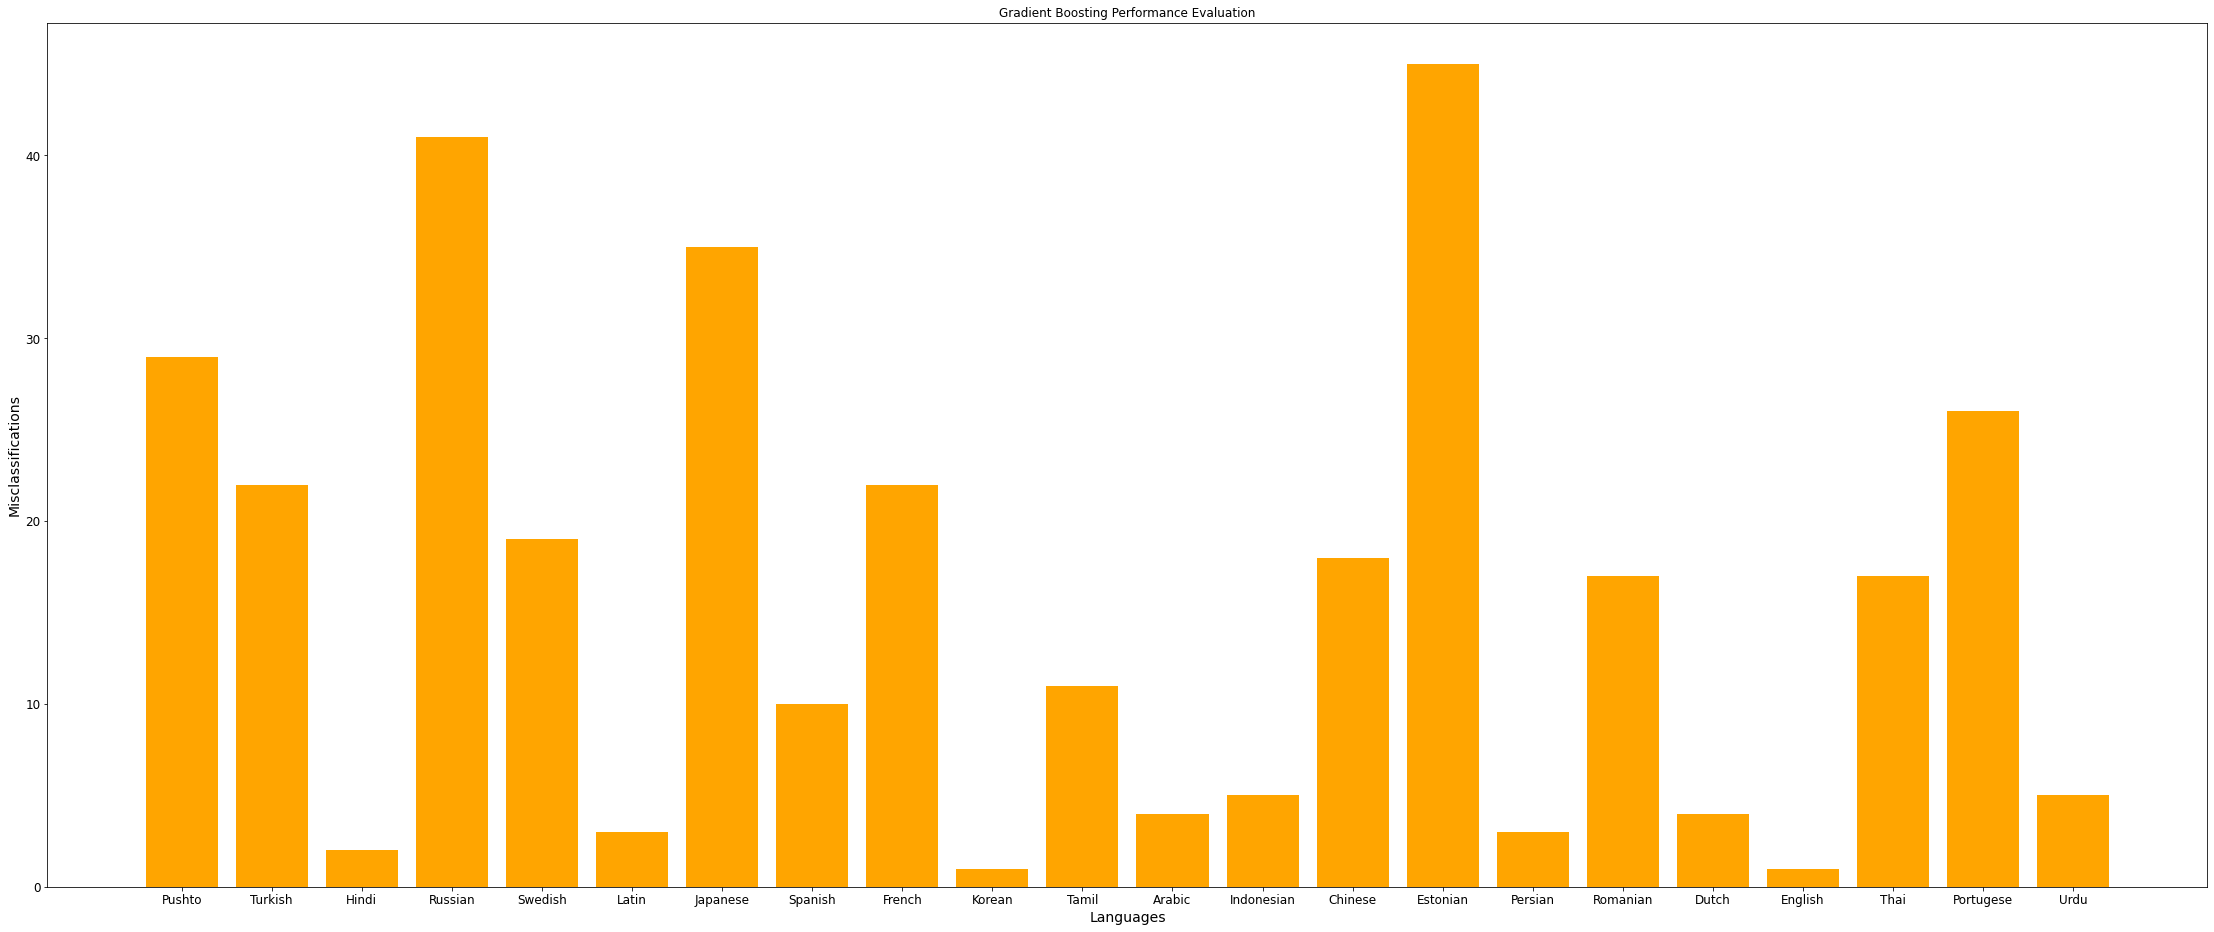

In [138]:
import matplotlib.pyplot as plt

# construct figure
fig = plt.figure()
ax = fig.add_axes([0,0,5,3])

# Construct bar plot and showcase
ax.bar(lang_list,language_count_arr, color = "orange")
plt.xlabel('Languages')
plt.ylabel('Misclassifications')
plt.title('Gradient Boosting Performance Evaluation')
plt.show()

# Comparing Models: Decision tree, Random Forest, and Gradient Booster

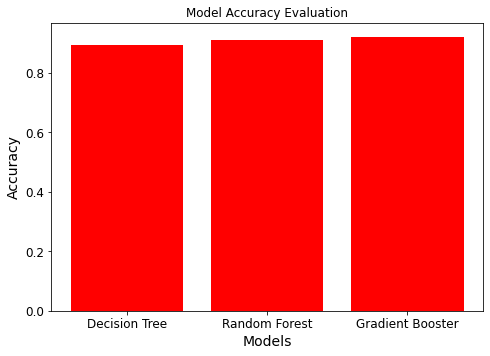

Gradient Booster seems to be the best model!
However, Gradient Booster score does not deviate that much from Random Forest score, 0.011363636363636354 ,
which may mean the their difference is not statistically signiificant.


In [157]:
import matplotlib.pyplot as plt

# construct figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# model names and corresponding scores
model_names = ['Decision Tree', 'Random Forest', 'Gradient Booster']
acc_scores = [0.8934090909090909,0.9113636363636364, 0.9227272727272727]

# construct bar plot
ax.bar(model_names,acc_scores, color = "red")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Evaluation')
plt.show()
print("Gradient Booster seems to be the best model!")
print("However, Gradient Booster score does not deviate that much from Random Forest score,",0.9227272727272727-0.9113636363636364,",")
print("which may mean the their difference is not statistically signiificant.")

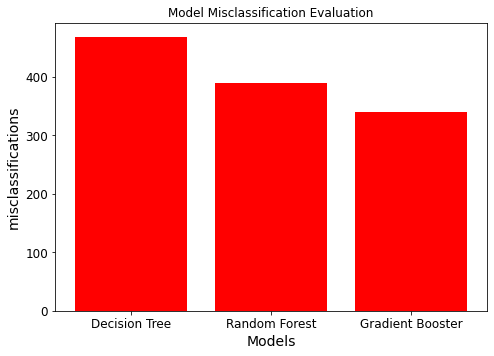

Out of all models, the Decision Tree model misclassified languages the most.


In [161]:
import matplotlib.pyplot as plt

# construct figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# model names and corresponding scores
model_names = ['Decision Tree', 'Random Forest', 'Gradient Booster']
misclf_totals = [469, 390, 340]

# construct bar plot
ax.bar(model_names,misclf_totals, color = "red")
plt.xlabel('Models')
plt.ylabel('misclassifications')
plt.title('Model Misclassification Evaluation')
plt.show()

print("Out of all models, the Decision Tree model misclassified languages the most.")

# Creating lists of alphabets for languages

In [ ]:
# Create these arrays into dictonaries
english_alpha = [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z]
estonian_alpha = [A, B, D, E, F, G, H, I, J, K, L, M, N, O, P, R, S, Š, Z, Ž, T, U, V, Õ, Ä, Ö, Ü]
swedish_alpha = [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z, å, ä, ö]
thai_alpha = [ก, ข, ค, ฅ, ฆ, ง, จ, ฉ, ช, ฌ, ญ, ฎ, ฏ, ฐ, ฑ, ฒ, ณ, ด, ต, ถ, ท, ธ, น, บ, บ, ผ, ฝ, พ, ฟ, ภ, 
               ม, ย, ร, ล, ว, ศ, ษ, ส, ห, ฬ, อ, ฮ] 
tamil_alpha = [அ, ஆ, இ, ஈ, உ, ஊ, எ, ஏ, ஐ, ஒ, ஓ, ஔ, க, ங, ச, ஞ, ட, ண, த, ந, ன, ப, ம, ய, ர, ற, ல, ள, ழ, வ]
dutch_alpha = english_alpha
japanese_alpha = [ぁ, あ, ぃ, い, ぅ, う, ぇ, え, ぉ, お, か, が, き, ぎ, く, ぐ, け, げ, こ, ご, さ, ざ, し, じ, す, ず,
                  せ, ぜ, そ, ぞ, た, だ, ち, ぢ, っ, つ, づ, て, で, と, ど, な, に, ぬ, ね, の, は, ば, ぱ, ひ, び, ぴ,
                  ふ, ぶ, ぷ, へ, べ, れ, る, り, ら, よ, ょ, ゆ, ゅ, や, ゃ, も, め, む, み, ま, ぽ, ぼ, ほ, ぺ, ろ, ゎ,
                  わ, ゐ, ゑ, を, ん, ゔ, ゕ, ゖ,  ゚, ゛, ゜, ゝ, ゞ, ゟ, ゠, ァ, ア, サ, ゴ, コ, ゲ, ケ, グ, ク, ギ, キ,
                  ガ, カ, オ, ォ, エ, ェ, ウ, ゥ, イ, ィ, ザ, シ, ジ, ス, ズ, セ, ゼ, ソ, ゾ, タ ,ダ ,チ ,ヂ, ッ, ツ, ヅ,
                  テ, デ, ト, ホ, ペ, ベ, ヘ, プ, ブ, フ, ピ, ビ, ヒ, パ, バ, ハ, ノ, ネ, ヌ, ニ, ナ, ド, ボ, ポ, マ, ミ, 
                  ム, メ, モ, ャ, ヤ, ュ, ユ, ョ, ヨ, ラ, リ, ル, レ, ロ, ヮ, ㍿, ㍐, ヿ, ヾ, ヽ, ー, ・, ヺ, ヹ, ヸ, ヷ,
                  ヶ, ヵ, ヴ, ン, ヲ, ヱ, ヰ, ワ]
turkish_alpha = [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, r, s, t, u, v, y, z, ç, ğ, ı, İ, î, ö, ş, ü]
latin_alpha = english_alpha
urdu_alpha = [ش,س,ژ,ز,ڑ,ر,ذ,ڈ,د,خ,ح,چ,
              ج,ث,ٹ,ت,پ,ب,آ,ا,ے,ی,ھ,ہ,و,ں,ن,م,ل,گ,ک,ق,ف,غ,ع,ظ,ط,ض,ص]
indonesian_alpha = english_alpha
portuguese_alpha = [ç, á, é, í, ó, ú, â, ê, ô, ã, õ, à, è, ì, ò, ù, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z]
french_alpha = [ç, é, â, ê, î, ô, û, à, è, ì, ò, ù, ë, ï, ü, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z]
chinese_alpha = [胡, 赛, 尼, 本, 人, 和, 小, 说, 的, 主, 人, 公, 阿, 米, 尔, 一, 样, 都, 是, 出, 生, 在, 阿, 富, 汗, 首, 都, 
                 喀, 布, 尔, 少, 年, 时, 代, 便, 离, 开, 了, 这, 个, 国, 家, 。, 胡, 赛, 尼, 直, 到, 年, 小, 说, 出, 版, 之, 
                 后, 才, 首, 次, 回, 到, 已, 经, 离, 开, 年, 的, 祖, 国, 。, 他, 在, 苏, 联, 入, 侵, 时, 离, 开, 了, 阿, 富, 
                 汗, 而, 他, 的, 很, 多, 童, 年, 好, 友, 在, 阿, 富, 汗, 生, 活, 在, 他, 们, 出, 发, 之, 前, 罗, 伯, 特, 伊,
                 达, 尔, 文, 卷, 查, 尔, 斯, 赖, 尔, 所, 著, 地, 质, 学, 原, 理, 在, 南, 美, 他, 得, 到, 第, 卷, 该, 书, 将, 
                 地, 形, 地, 貌, 解, 释, 为, 漫, 长, 历, 史, 时, 间, 渐, 进, 演, 变, 的, 的, 结, 果, 当, 他, 旅, 程, 的, 第, 
                 站, 抵, 达, 圣, 地, 亚, 哥, 佛, 得, 角, 的, 时, 候, 达, 尔, 文]
korean_alpha = [ᄁ,ᄂ,ᄃ,ᄄ,ᄅᄆᄇ,ᄈ,ᄉ,ᄊ,ᄋ,ᄌᄍ,ᄎ,ᄏ,ᄐ,ᄑᄒ,아,악,안,알,암,압,앙,앞애,액,앵야,얀,약,양,얘,어,억,
                언,얼,엄,업,엉,에,여,역,연,열,염,엽,영,예,ᄀ,여,역,연,열,염,엽,영,예,오,옥,온,올,옴,옹,와,완,왈,왕,왜,외,왼,
                요,욕,용,우,욱,운,울,움,웅,워,원,월,위,유,육,윤,율,융,윷,으,은,을,음읍,응,의,이,익,인,일,임,입,잉,잎]
hindi_alpha = [ऄ, अ, आ, इ, ई, उ, ऊ, ऋ, ऌ, ऍ, ऎ, ए, ऐ, ऑ, ऒ, ओ, औ, क, ख, ग, घ, ङ, च, छ, ज, झ, प, ऩ, न, ध, द, 
               थ, त, ण, ढ, ड, ठ, ट, ञ, फ, ब, भ, म, य, र, ऱ, ल, ळ, ऴ, व, श, ष, ४, ३, २, १, ०, ॥, ।, ॡ, ॠ, ॐ, ऽ, 
               ह, स, ५, ६, ७, ॲ, ॳ, ॴ, ॵ, ॶ, ॷ, ॹ, ॺ, ॻ, ॼ, ॾ, ॿ, ೱऀँं, ः, ऺ, ऻ, ा, ि, ी, ॎ, ॏॕैेॣॢ, ॗ]
spanish_alpha = [á, é, í, ó, ú, ñ, ü, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z]
pushto_alpha = [ﺏ ,پ ,ﺕ ,ټ ,ﺙ ,ﺝ ,چ ,ﺡ ,ﺥ ,څ ,ځ ,ﺩ ,ډ ,ﺫ ,ﺭ ,ړ ,ﺯ ,ژ ,ږ ,ﺱ ,ﺵ ,ښ ,ﺹ ,ﺽ ,ﻁ ,ﻅ ,ﻉ ,ﻍ ,ﻑ ,ﻕ ,ک ,ګ ,ﻝ ,ﻡ ,ﻥ ,ڼ, ,ﻭ ,ه ,ۀ ,ي ,ې ,ی ,ۍ ,ئ]
persian_alpha = [,ش,س,ژ,ز,ر,ذ,د,خ,ح,چ,ج,ث,ت,پ,ب,آ,ا,ص,ض,ط,ظ,ع,غ,ف,ق,ک,گ,ل,م,ن,و,ه,ی]
romanian_alpha = [ă, â, î, ș, ş, ț, ţ, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z]
russian_alpha = [б, в, г, д, ж, з, к, л, м, н, п, р, с, т, ф, х, ц, ч, ш, щ, а, е, ё, и, о, у, ы, э, ю, я, й]
arabic_alpha = [ش,س,ز,ر,ذ,د,خ,ح,ج,ث,ت,ب,ا,ء,ي,و,ه,ن,م,ل,ك,ق,ف,غ,ع,ظ,ط,ض,ص]


In [ ]:
#characters for first model
chars = ['e', 't', 'ä', 'ö', 'a', 'n', 'ก', 'ข', 'ค', 'ฅ', 'ฆ', 'ง', 'அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 
         'o', 'r', 'ー', '日', 'あ', 'ぁ', 'ぇ', 'ç', 'ğ', 'ı', 'İ', 'î', 'ö', 'ş', 'i', 'u', 'چ', 'ح', 'خ', 'ش',
         'â', 'ù', 'è', 's', 'î', 'ë', '胡', '童', '。', 'ᄁ', '알', '에', 'ᄃ', 'ऺ', 'त', 'ऻ', 'क', 'á', 'é', 'í', 
         'ó', 'ږ','ک', 'ﻑ', 'ی', 'م', 'ث', 'ţ', 'ă', 'ș', 'ş', 'б', 'в', 'г', 'д', 'ص', 'ف', 'ج', 'ر']

new_chars = [['e', 't', 'a', 'i', 'o', 'n', 's', 'h', 'r'], ['a', 'e', 'i', 'ä', 'ö', 'õ', 'š', 'ü', 'ž'], 
             ['å', 'ä', 'ö', 'a', 'e', 't', 'n', 'r', 's', 'i'], ['ก', 'ข', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช', 'ฌ'],
             ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ'], ['a', 'e', 'i', 'o', 'h', 'n', 'r', 't', 's'], 
             ['㍿', '㍐', 'ヿ', 'ヾ', 'ヽ', 'ー', '・', 'ヺ', 'ヹ', 'ヸ'], ['ç', 'ğ', 'ı', 'İ', 'î', 'ö', 'ş', 'ü', 'a', 'e'],
             ['a', 'e', 'i', 'n', 'r', 's', 't', 'u', 'm', 'd'], ['چ', 'ح', 'خ', 'ش', 'ن', 'ٹ', 'ن', 'ث', 'گ', 'ج'],
             ['a', 'A', 'i', 'n', 'r', 'm', 's', 't', 'u', 'g'], ['â', 'ê', 'ô', 'ã', 'õ', 'à', 'è', 'ì', 'ò', 'ù'],
             ['ô', 'û', 'à', 'è', 'ì', 'ò', 'ù', 'ë', 'ï', 'ü'], ['主', '人', '公', '阿', '米', '尔', '一', '样', '都', '是'],
             ['응','의','이','익','인','일','임','입','잉','잎'], ['ः', 'ऺ', 'ऻ', 'ा', 'ि', 'ी', 'ॎ', 'ई', 'उ', 'ऊ'], 
             ['á', 'é', 'í', 'ó', 'ú', 'ñ', 'ü', 't', 'e', 'i'], ['ت', 'ا', 'ې', 'ښ', 'ن', 'ر', 'ع', 'ط', 'ړ', 'س'],
             ['ق', ' غ', 'ج', 'ت', ' ن ', 'ی', 'ل ', 'ظ', 'ص', 'ز'], ['ă', 'â', 'î', 'ș', 'ş', 'ț', 'ţ'], 
             ['б', 'в', 'г', 'д', 'ж', 'з', 'к', 'л', 'м', 'н'], ['م', 'ص', 'ظ', 'و', 'ر', 'م', 'ي', 'ج', 'ز', 'ق']]